In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind


pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

cacao = pd.read_csv('cacao_flavors.csv')

display(cacao.head(10))
cacao.info()
cacao


,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,7,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,8,A. Morin,Sur del Lago,1315,2014,70%,France,11.50,Criollo,Venezuela
8,9,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,10,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
Bar id                              1795 non-null int64
Company 
(Maker-if known)           1795 non-null object
Specific Bean Origin
or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review
Date                         1795 non-null int64
Cocoa
Percent                       1795 non-null object
Company
Location                    1795 non-null object
Rating                              1795 non-null float64
Bean
Type                           1794 non-null object
Broad Bean
Origin                   1794 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...,...
1790,1791,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,1792,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,1793,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,1794,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [40]:
cacao.columns

Index(['Bar id', 'Company \n(Maker-if known)',
       'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate',
       'Cocoa\nPercent', 'Company\nLocation', 'Rating', 'Bean\nType',
       'Broad Bean\nOrigin'],
      dtype='object')

1795


bar_id                                                 1545
company                                                Soma
specific_origin     Three Amigos(Chuao, Wild Bolivia, D.R.)
ref                                                     676
review_date                                            2011
cocoa_percent                                           70%
company_location                                     Canada
rating                                                    4
bean_type                                               NaN
broad_origin                             Ven, Bolivia, D.R.
Name: 1544, dtype: object

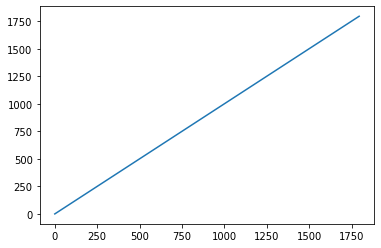

In [44]:
cacao.columns = ['bar_id', 'company', 'specific_origin', 'ref', 'review_date', 'cocoa_percent', 
              'company_location', 'rating', 'bean_type', 'broad_origin']
print(cacao.bar_id.nunique())
plt.plot(cacao.bar_id)
cacao.bean_type.value_counts()
cacao.loc[1544]

In [6]:
cacao.drop(['bar_id'], inplace = True, axis = 1)
pd.DataFrame(cacao.company.value_counts())

,company
,99
Soma,45
Bonnat,26
Fresco,26
Pralus,25
...,...
To'ak (Ecuatoriana),1
Heilemann,1
Kerchner,1
Monarque,1


In [7]:
cacao.company = cacao.company.apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(cacao.company.value_counts())

,company
Soma,45
Bonnat,26
Fresco,26
Pralus,25
Domori,22
...,...
Blanxart,1
Green Bean to Bar,1
Anahata,1
Chchukululu (Tulicorp),1


In [8]:
display(pd.DataFrame(cacao.company.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.company.value_counts()>10).sum())
cacao.loc[:, ['company']].info()

,company
Soma,45
Bonnat,26
Fresco,26
Pralus,25
Domori,22
...,...
Blanxart,1
Green Bean to Bar,1
Anahata,1
Chchukululu (Tulicorp),1


Значений, встретившихся в столбце более 10 раз: 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
company    1696 non-null object
dtypes: object(1)
memory usage: 14.1+ KB


In [9]:
cacao.specific_origin = cacao.specific_origin.apply(lambda x: None if x.strip() == '' else x)

In [10]:
origins = pd.DataFrame(cacao.specific_origin.value_counts())
origins

,specific_origin
Madagascar,55
Peru,44
Ecuador,39
Dominican Republic,33
Venezuela,21
...,...
"Ghana, 2013",1
Complexite,1
Australia,1
"Vale do Juliana E., Atlantic Forest",1


In [11]:
morethanten = origins['specific_origin'] >10
morethanten

Madagascar                              True
Peru                                    True
Ecuador                                 True
Dominican Republic                      True
Venezuela                               True
                                       ...  
Ghana, 2013                            False
Complexite                             False
Australia                              False
Vale do Juliana E., Atlantic Forest    False
Maracaibo Clasificado                  False
Name: specific_origin, Length: 1012, dtype: bool

In [12]:
morethantenorigins = origins[morethanten]
print(morethantenorigins)
morethantenorigins.count()

                    specific_origin
Madagascar                       55
Peru                             44
Ecuador                          39
Dominican Republic               33
Venezuela                        21
Chuao                            18
Sambirano                        18
Ocumare                          16
Papua New Guinea                 15
Ghana                            15
Belize                           13
Bolivia                          12
La Red                           11
Tanzania                         11
Brazil                           11


specific_origin    15
dtype: int64

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

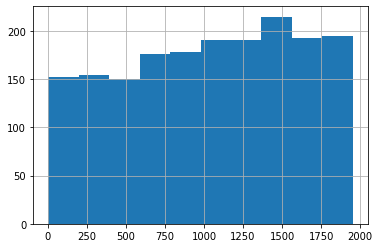

In [13]:
cacao.ref.hist()
cacao.ref.describe()


count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

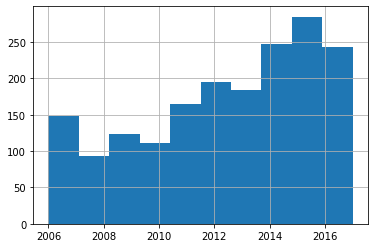

In [14]:
cacao.review_date.hist()
cacao.review_date.describe()

count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent, dtype: float64

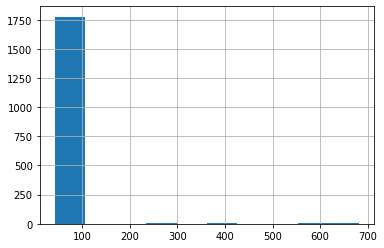

In [15]:
cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%', '')))
cacao.cocoa_percent.hist()
cacao.cocoa_percent.describe()

25-й перцентиль: 70.0, 75-й перцентиль: 75.0, IQR: 5.0,  Границы выбросов: [62.5, 82.5].


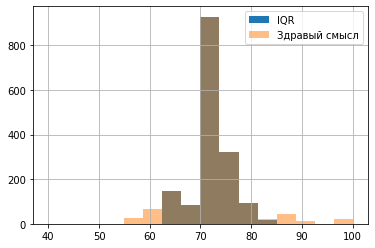

In [16]:
median = cacao.cocoa_percent.median()
IQR = cacao.cocoa_percent.quantile(0.75) - cacao.cocoa_percent.quantile(0.25)
perc25 = cacao.cocoa_percent.quantile(0.25)
perc75 = cacao.cocoa_percent.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
cacao.cocoa_percent.loc[cacao.cocoa_percent.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 16
                                                                                              , range = (40, 100), 
                                                                                             label = 'IQR')
cacao.cocoa_percent.loc[cacao.cocoa_percent <= 100].hist(alpha = 0.5, bins = 16, range = (40, 100),
                                                        label = 'Здравый смысл')
plt.legend();

In [17]:
print(cacao['cocoa_percent'].max())
cacao = cacao.loc[cacao.cocoa_percent <= 100]
cacao['cocoa_percent'].max()

682.0


100.0

In [18]:
cacao.company_location

0        France
1        France
3        France
4        France
5        France
         ...   
1790    Austria
1791    Austria
1792    Austria
1793    Austria
1794    Austria
Name: company_location, Length: 1776, dtype: object

In [19]:
display(pd.DataFrame(cacao.company_location.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.company_location.value_counts()>10).sum())
print(cacao.loc[:, ['company_location']])
cacao.loc[:, ['company_location']].info()

,company_location
U.S.A.,756
France,155
Canada,124
U.K.,94
Italy,63
...,...
Wales,1
Suriname,1
India,1
Russia,1


Значений, встретившихся в столбце более 10 раз: 22
     company_location
0              France
1              France
3              France
4              France
5              France
...               ...
1790          Austria
1791          Austria
1792          Austria
1793          Austria
1794          Austria

[1776 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
company_location    1776 non-null object
dtypes: object(1)
memory usage: 27.8+ KB


In [20]:
cacao.rating

0       11.50
1        2.75
3        3.50
4        3.50
5        2.75
        ...  
1790     3.75
1791     3.00
1792     3.50
1793     3.25
1794     3.00
Name: rating, Length: 1776, dtype: float64

count    1776.000000
mean        3.425816
std         1.759007
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max        19.750000
Name: rating, dtype: float64

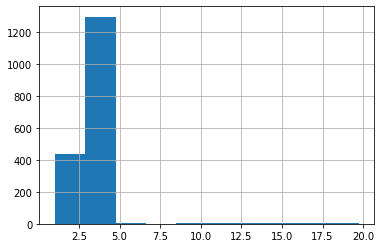

In [21]:
cacao.rating.hist()
cacao.rating.describe()

25-й перцентиль: 3.0, 75-й перцентиль: 3.5, IQR: 0.5,  Границы выбросов: [2.25, 4.25].


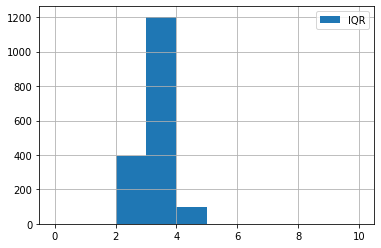

In [22]:
median = cacao.rating.median()
IQR = cacao.rating.quantile(0.75) - cacao.rating.quantile(0.25)
perc25 = cacao.rating.quantile(0.25)
perc75 = cacao.rating.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
cacao.rating.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();

In [23]:
cacao = cacao.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [24]:
cacao.broad_origin = cacao.broad_origin.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())
(cacao.broad_origin.value_counts()>10).sum()

26

In [25]:
cacao = pd.read_csv('cacao_flavors2.csv')
cacao.columns = ['bar_id', 'company', 'specific_origin', 'ref', 'review_date', 'cocoa_percent', 
              'company_location', 'rating', 'bean_type', 'broad_origin']
print(cacao.broad_origin[pd.isnull(cacao.broad_origin)])
cacao.broad_origin = cacao.broad_origin.apply(lambda x: None if pd.isnull(x) else None if x.strip() == '' else x)
cacao.broad_origin.nunique()


1072    NaN
Name: broad_origin, dtype: object


99

In [26]:
def fix_countries(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')
    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)
    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
        
    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')
    
    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
        
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
        
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
        
    if 'Per' in x and 'Peru'  not in x:
        x = x.replace('Per', 'Peru')
    
    x = x.replace('Nic.', 'Nicaragua')

    x = x.replace('Gre.', 'Grenada')
    
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
        
    x = x.replace('Haw.', 'Hawaii')
    
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    return x

In [27]:
cacao.broad_origin = cacao.broad_origin.apply(fix_countries).sort_values()

In [28]:
cacao.broad_origin.nunique()

96

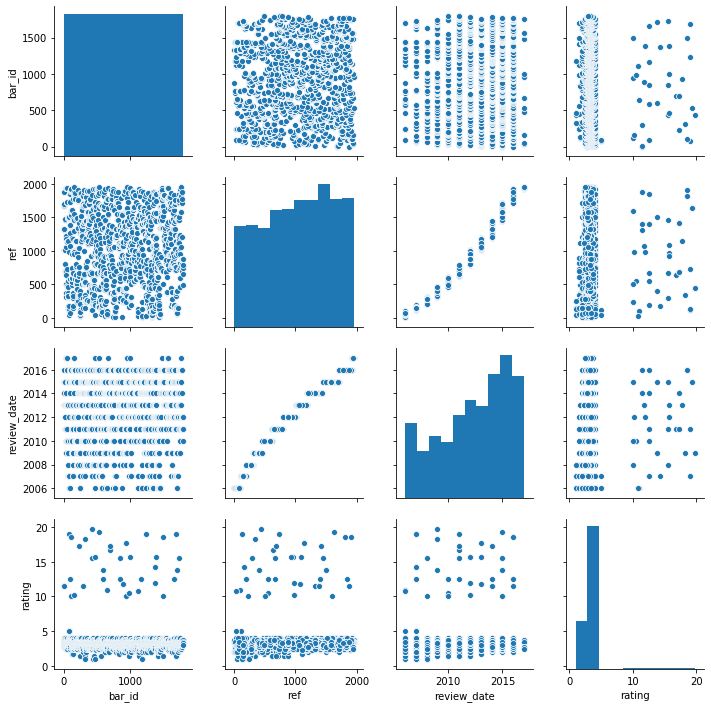

In [29]:
sns.pairplot(cacao)

In [30]:
cacao = pd.read_csv('cacao_flavors2.csv')
cacao.columns = ['bar_id', 'company', 'specific_origin', 'ref', 'review_date', 'cocoa_percent', 
              'company_location', 'rating', 'bean_type', 'broad_origin']
cols = cacao.loc[:, 'company'].value_counts().index[:10]

combinatiosn_all = list(combinations(cols, 2))
cacao.loc[cacao.loc[:, 'company'] == combinatiosn_all[0][1], 'rating']

1507    3.50
1508    3.50
1509    3.50
1511    3.75
1512    4.00
1513    3.25
1514    3.50
1515    4.00
1516    3.50
1517    3.75
1518    3.25
1519    3.50
1520    3.75
1521    3.25
1522    3.75
1523    3.25
1524    2.75
1525    3.75
1526    3.25
1527    3.75
1528    4.00
1529    4.00
1530    4.00
1531    3.25
1532    4.00
1533    3.25
1534    3.75
1535    4.00
1537    3.50
1538    3.75
1539    3.50
1540    3.50
1541    2.75
1542    3.50
1543    4.00
1544    4.00
1545    3.75
1546    3.50
1547    3.75
1548    3.00
1549    3.50
1550    3.00
1551    3.50
1552    3.75
1553    3.75
Name: rating, dtype: float64